In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df

import matplotlib.pyplot as plt
import seaborn as sns

import os


In [37]:
difftime_df = pd.read_excel('difftime-data.xlsx')

In [38]:
COMP = 'Competitive'
BASE = 'Baseline'
COOP = 'Cooperative'
DIFFTIME = 'diff_time (s)'
TYPE = 'type'

In [39]:
difftime_df

,Game type,Total accepted trades,diff_time (s),type
0,A1,33.0,11.846,Competitive
1,NaN,NaN,13.544,Competitive
2,NaN,NaN,13.098,Competitive
3,NaN,NaN,16.198,Competitive
4,NaN,NaN,14.803,Competitive
...,...,...,...,...
634,NaN,NaN,11.504,Cooperative
635,NaN,NaN,7.571,Cooperative
636,NaN,NaN,19.560,Cooperative
637,NaN,NaN,14.352,Cooperative


In [40]:
medians = difftime_df.groupby([TYPE])[DIFFTIME].median()
means = difftime_df.groupby([TYPE])[DIFFTIME].mean()
maxs = difftime_df.groupby([TYPE])[DIFFTIME].max()
mins = difftime_df.groupby([TYPE])[DIFFTIME].min()

vertical_offset_median = difftime_df[DIFFTIME].median() * 0.03 # offset from median for display
vertical_offset_mean = difftime_df[DIFFTIME].mean() * 0.07 # offset from median for display
vertical_offset_max = difftime_df[DIFFTIME].max() * 0.03 # offset from median for display
vertical_offset_min = difftime_df[DIFFTIME].min() * 0.5 # offset from median for display


# medians, means, mins, maxs

In [41]:
medians = medians.round(2)
means = means.round(2)
maxs = maxs.round(2)
mins = mins.round(2)

medians, means, mins, maxs


(type
 Baseline       14.00
 Competitive    15.07
 Cooperative    13.34
 Name: diff_time (s), dtype: float64,
 type
 Baseline       24.01
 Competitive    27.28
 Cooperative    18.54
 Name: diff_time (s), dtype: float64,
 type
 Baseline       1.93
 Competitive    3.77
 Cooperative    3.81
 Name: diff_time (s), dtype: float64,
 type
 Baseline       567.47
 Competitive    775.54
 Cooperative    632.43
 Name: diff_time (s), dtype: float64)

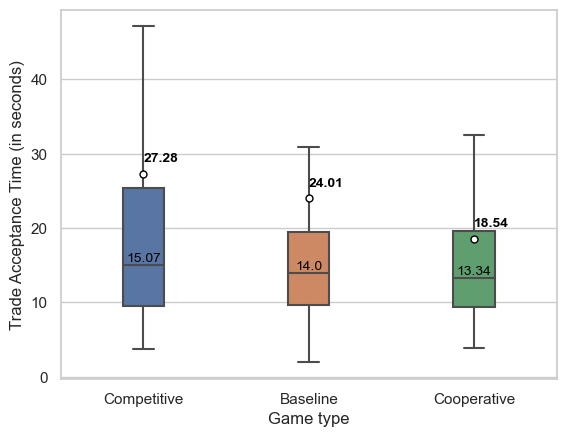

In [47]:
# fig, ax = plt.subplots()

sns.set(style='whitegrid')
difftime_plot = sns.boxplot(
    x=TYPE, y=DIFFTIME, data = difftime_df,
    width=.25, showfliers=False, showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "white",
               "markeredgecolor": "black", "markersize": "5"})
# fig = difftime_plot.get_figure()
# fig, ax = plt.subplots()
difftime_plot.set_ylabel('Trade Acceptance Time (in seconds)')
difftime_plot.set_xlabel('Game type')
# difftime_plot.axes.set_title("Game type vs Trade Acceptance Time", fontsize=15)
# for xtick in difftime_plot.get_xticks():

# medians show value
difftime_plot.text(0, medians[1] + vertical_offset_median, medians[1],
                   horizontalalignment='center',
                   size='small',color='black')
difftime_plot.text(1, medians[0] + vertical_offset_median, medians[0],
                   horizontalalignment='center',
                   size='small',color='black')
difftime_plot.text(2, medians[2] + vertical_offset_median, medians[2],
                   horizontalalignment='center',
                   size='small',color='black')
# means show value
# weight='semibold'
difftime_plot.text(0, means[1] + vertical_offset_mean, means[1],
                   horizontalalignment='left',
                   size='small',color='black', weight='bold')
difftime_plot.text(1, means[0] + vertical_offset_mean, means[0],
                   horizontalalignment='left',
                   size='small',color='black', weight='bold')
difftime_plot.text(2, means[2] + vertical_offset_mean, means[2],
                   horizontalalignment='left',
                   size='small',color='black', weight='bold')
# mins show value
# difftime_plot.text(0, mins[2] + vertical_offset_min, medians[2],
#                    horizontalalignment='left',
#                    size='small',color='black')
# difftime_plot.text(1, mins[0] + vertical_offset_min, medians[0],
#                    horizontalalignment='left',
#                    size='small',color='black')
# difftime_plot.text(2, mins[1] + vertical_offset_min, medians[1],
#                    horizontalalignment='left',
#                    size='small',color='black')
# maxs show value
# difftime_plot.text(0, maxs[2] + vertical_offset_max, medians[2],
#                    horizontalalignment='center',
#                    size='small',color='black')
# difftime_plot.text(1, maxs[0] + vertical_offset_max, medians[0],
#                    horizontalalignment='center',
#                    size='small',color='black')
# difftime_plot.text(2, maxs[1] + vertical_offset_max, medians[1],
#                    horizontalalignment='center',
#                    size='small',color='black')

# ax.yaxis.grid(True) # Hide the horizontal gridlines
# ax.xaxis.grid(True) # Show the vertical gridlines
plt.show()
fig.savefig('gametype-difftime.jpg')                                          


In [48]:
q1, med, q3 = np.percentile(difftime_df[DIFFTIME], [25, 50, 75])
# q1, med, q3
print(difftime_df.groupby([TYPE])[DIFFTIME].describe())
typewise_stats_df = difftime_df.groupby([TYPE])[DIFFTIME].describe()

q1_base = typewise_stats_df.loc[BASE, '25%']
q3_base = typewise_stats_df.loc[BASE, '75%']
q1_comp = typewise_stats_df.loc[COMP, '25%']
q3_comp = typewise_stats_df.loc[COMP, '75%']
q1_coop = typewise_stats_df.loc[COOP, '25%']
q3_coop = typewise_stats_df.loc[COOP, '75%']

iqr_base = (q3_base - q1_base) * 1.5
iqr_comp = (q3_comp - q1_comp) * 1.5
iqr_coop = (q3_coop - q1_coop) * 1.5

print(iqr_base, iqr_comp, iqr_coop)

ml_base = q3_base + iqr_base
ml_comp = q3_comp + iqr_comp
ml_coop = q3_coop + iqr_coop

print(difftime_df.groupby([TYPE])[DIFFTIME].median(), ml_base, ml_coop, ml_comp)

             count       mean        std    min      25%      50%       75%  \
type                                                                          
Baseline     188.0  24.009271  60.862423  1.929  9.68025  13.9965  19.46125   
Competitive  215.0  27.281381  68.093143  3.769  9.53000  15.0730  25.33200   
Cooperative  236.0  18.538691  41.976893  3.814  9.39075  13.3395  19.63300   

                 max  
type                  
Baseline     567.469  
Competitive  775.540  
Cooperative  632.435  
14.671499999999998 23.703 15.363374999999998
type
Baseline       13.9965
Competitive    15.0730
Cooperative    13.3395
Name: diff_time (s), dtype: float64 34.13275 34.996375 49.035


In [49]:
COMP = 'Competitive'
BASE = 'Baseline'
COOP = 'Cooperative'
TYPE = 'type'
WHISPER = 'whisper chat (%)'

In [50]:
whisper_df = pd.read_excel('whisper-broadcast-data.xlsx')

In [51]:
whisper_df[WHISPER] = whisper_df[WHISPER] * 100

In [52]:
whisper_df

,whisper chat (%),type,Unnamed: 2,Unnamed: 3
0,0.000000,Competitive,NaN,0.316176
1,26.530612,Competitive,NaN,0.131183
2,0.000000,Competitive,NaN,NaN
3,2.727273,Competitive,NaN,NaN
4,0.000000,Competitive,NaN,NaN
...,...,...,...,...
104,1.960784,Cooperative,NaN,NaN
105,22.222222,Cooperative,NaN,NaN
106,19.230769,Cooperative,NaN,NaN
107,2.500000,Cooperative,NaN,NaN


In [53]:
medians = whisper_df.groupby([TYPE])[WHISPER].median()
means = whisper_df.groupby([TYPE])[WHISPER].mean()
maxs = whisper_df.groupby([TYPE])[WHISPER].max()
mins = whisper_df.groupby([TYPE])[WHISPER].min()

vertical_offset_median = whisper_df[WHISPER].median() * 0.17 # offset from median for display
vertical_offset_mean = whisper_df[WHISPER].mean() * 0.34 # offset from median for display
vertical_offset_max = whisper_df[WHISPER].max() * 0.03 # offset from median for display
vertical_offset_min = whisper_df[WHISPER].min() * 0.5 # offset from median for display


# medians, means, mins, maxs

In [54]:
medians = medians.round(2)
means = means.round(2)
maxs = maxs.round(2)
mins = mins.round(2)

medians, means, mins, maxs


(type
 Baseline       1.61
 Competitive    4.35
 Cooperative    2.50
 Name: whisper chat (%), dtype: float64,
 type
 Baseline       12.65
 Competitive    23.52
 Cooperative    10.43
 Name: whisper chat (%), dtype: float64,
 type
 Baseline       0.0
 Competitive    0.0
 Cooperative    0.0
 Name: whisper chat (%), dtype: float64,
 type
 Baseline       70.83
 Competitive    94.74
 Cooperative    38.57
 Name: whisper chat (%), dtype: float64)

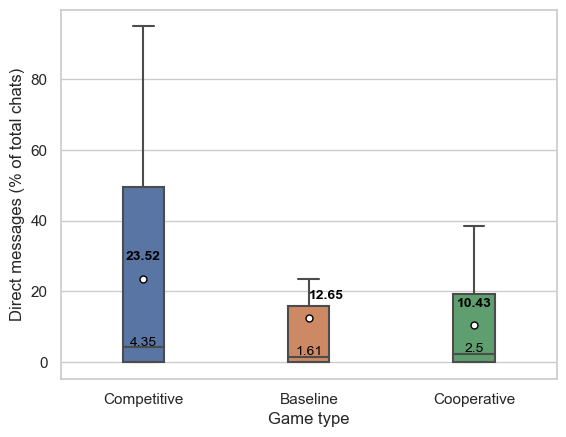

In [55]:
sns.set(style='whitegrid')

whisper_plot = sns.boxplot(
    x=TYPE, y=WHISPER, data = whisper_df,
    width=.25, showfliers=False, showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "white",
               "markeredgecolor": "black", "markersize": "5"})
fig = whisper_plot.get_figure()
whisper_plot.set_ylabel('Direct messages (% of total chats)')
whisper_plot.set_xlabel('Game type')

# medians show value
whisper_plot.text(0, medians[1] + vertical_offset_median, medians[1],
                   horizontalalignment='center',
                   size='small',color='black')
whisper_plot.text(1, medians[0] + vertical_offset_median, medians[0],
                   horizontalalignment='center',
                   size='small',color='black')
whisper_plot.text(2, medians[2] + vertical_offset_median, medians[2],
                   horizontalalignment='center',
                   size='small',color='black')
# means show value
# weight='semibold'
whisper_plot.text(0, means[1] + vertical_offset_mean, means[1],
                   horizontalalignment='center',
                   size='small',color='black', weight='bold')
whisper_plot.text(1, means[0] + vertical_offset_mean, means[0],
                   horizontalalignment='left',
                   size='small',color='black', weight='bold')
whisper_plot.text(2, means[2] + vertical_offset_mean, means[2],
                   horizontalalignment='center',
                   size='small',color='black', weight='bold')


plt.show()
fig.savefig('gametype-whisper.jpg')                                          
